# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [3]:
import math
N = 10000
d = 10

ad_selected = []
Ni = [0] * d
Ri = [0] * d
tr = 0

for n in range(0,N):

  ad = 0
  max_upper_bound = 0

  for i in range(0, d):

    if Ni[i] > 0:
      average_reward = Ri[i]/Ni[i]
      confidence_interval = math.sqrt(((3/2)*math.log(n+1))/(Ni[i]))
      upper_bound = average_reward + confidence_interval
    else:
      upper_bound = 1e400

    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = i

  ad_selected.append(ad)
  Ni[ad] += 1
  Ri[ad] += dataset.values[n,ad]
  tr += dataset.values[n,ad]

## Visualising the results

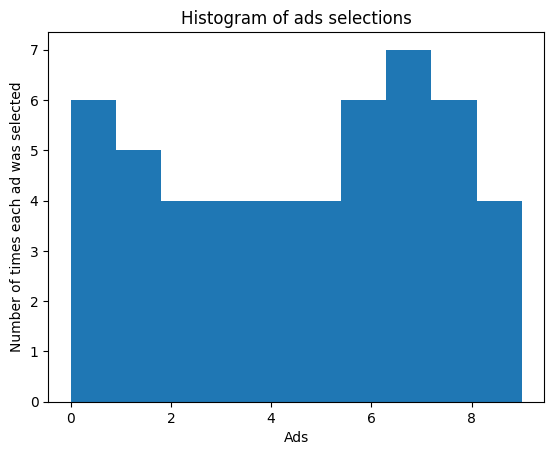

In [4]:
plt.hist(x=ad_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()